In [1]:
# Import needed libraries
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw


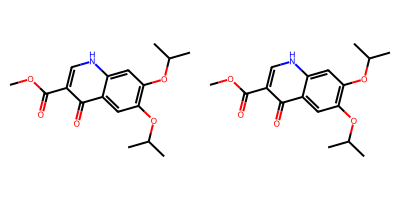

In [2]:
# Test printing molecule
smiles = ['COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O', "COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O"]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [6]:
# Import data
data_raw = pd.read_csv('tested_molecules.csv')
data_raw.head()

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0


In [10]:
# Make for each SMILES string, new object
data_properties = data_raw.copy()
data_properties['molecule_object'] = [Chem.MolFromSmiles(x) for x in data_properties['SMILES']]


# Calculate properies of molecules
# Useful link for this: https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
data_properties['num_atoms'] = [x.GetNumAtoms() for x in data_properties['molecule_object']]
data_properties['molecular_weight'] = [rdkit.Chem.rdMolDescriptors.CalcExactMolWt(x) for x in data_properties['molecule_object']]
data_properties['num_amide_bonds'] = [rdkit.Chem.rdMolDescriptors.CalcNumAmideBonds(x) for x in data_properties['molecule_object']]
data_properties['num_aromatic_rings'] = [rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(x) for x in data_properties['molecule_object']]
data_properties['num_stereocenters'] = [rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(x) for x in data_properties['molecule_object']]
data_properties['num_H_bond_acceptors'] = [rdkit.Chem.rdMolDescriptors.CalcNumHBA(x) for x in data_properties['molecule_object']]
data_properties['num_H_bond_donors'] = [rdkit.Chem.rdMolDescriptors.CalcNumHBD(x) for x in data_properties['molecule_object']]
data_properties['num_rings'] = [rdkit.Chem.rdMolDescriptors.CalcNumRings(x) for x in data_properties['molecule_object']]
data_properties['num_rotatable_bonds'] = [rdkit.Chem.rdMolDescriptors.CalcNumRotatableBonds(x) for x in data_properties['molecule_object']]

# Kaj
data_properties['fraction_c_sp3'] = [rdkit.Chem.rdMolDescriptors.CalcFractionCSP3(x) for x in data_properties['molecule_object']]



data_properties.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,molecule_object,num_atoms,molecular_weight,num_amide_bonds,num_aromatic_rings,num_stereocenters,num_H_bond_acceptors,num_H_bond_donors,num_rings,num_rotatable_bonds,fraction_c_sp3
0,C=C(C)c1nc(N)nc(N)n1,0,0,<rdkit.Chem.rdchem.Mol object at 0x000002590F1...,11,151.085795,0,1,0,5,2,1,1,0.166667
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,<rdkit.Chem.rdchem.Mol object at 0x000002590F1...,17,250.039672,0,2,0,3,0,2,3,0.153846
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,<rdkit.Chem.rdchem.Mol object at 0x000002590F1...,15,210.136828,2,0,0,2,2,0,8,0.454545
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,<rdkit.Chem.rdchem.Mol object at 0x000002590F1...,17,232.084792,0,2,0,4,0,2,3,0.166667
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,<rdkit.Chem.rdchem.Mol object at 0x000002590F1...,15,226.050905,0,1,0,4,0,1,4,0.200000


In [5]:
one_molecule = data_properties['molecule_object'].iloc[0]
a = rdkit.Chem.rdMolDescriptors.CalcExactMolWt(one_molecule)
